In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('data_cleaned.csv')

In [8]:
df.head(20)
#further analyze the job description
#Type of ownership encode
#revenue cleaning


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,Revenue,salary,Company,State,age,SAS,python,aws,tableau,spark
0,Data Scientist,$78K-$133K (Glassdoor est.),"Publishers Clearing House (PCH), located in Je...",3.3,Publishers Clearing House LLC\n3.3,"Jericho, NY",501 to 1000 Employees,1953,Company - Private,Advertising & Marketing,...,$500 million to $1 billion (USD),78-133,Publishers Clearing House LLC\n,NY,67,1,1,1,0,0
1,Data Scientist Architect,$78K-$133K (Glassdoor est.),This career opportunity is in our Minneapolis ...,4.2,"Sullivan, Cotter and Associates, Inc.\n4.2","Minneapolis, MN",201 to 500 Employees,1992,Company - Private,Consulting,...,Unknown / Non-Applicable,78-133,"Sullivan, Cotter and Associates, Inc.\n",MN,28,0,1,0,1,0
2,Revit Expert / BIM Modeling Engineer - Concret...,$78K-$133K (Glassdoor est.),We are seeking a professional familiar with co...,-1.0,Palatial Concrete,"Alexandria, VA",-1,-1,-1,-1,...,-1,78-133,Palatial Concrete,VA,-1,0,0,0,0,0
3,Bioinformatics Scientist,$78K-$133K (Glassdoor est.),Bioinformatics Scientist*\nEclipse is an RNA g...,-1.0,Eclipse BioInnovations,"San Diego, CA",-1,-1,-1,-1,...,-1,78-133,Eclipse BioInnovations,CA,-1,0,1,1,0,0
4,Data Engineer,$78K-$133K (Glassdoor est.),The Data Engineer will work with product owner...,2.7,Chenega Corporation\n2.7,"Springfield, VA",5001 to 10000 Employees,1974,Company - Private,Aerospace & Defense,...,$500 million to $1 billion (USD),78-133,Chenega Corporation\n,VA,46,0,0,1,0,0
5,Risk Analytics Manager,$78K-$133K (Glassdoor est.),Position summary: *\nThis Risk Analytics Manag...,4.4,"Cane Bay Partners VI, LLLP\n4.4","Saint Croix, VI",1 to 50 Employees,2009,Company - Private,Consulting,...,Less than $1 million (USD),78-133,"Cane Bay Partners VI, LLLP\n",VI,11,1,1,0,0,0
6,Senior Food Scientist,$78K-$133K (Glassdoor est.),Senior Food Scientist *\nWe’re looking for a P...,3.5,R. Torre & Company\n3.5,"San Francisco, CA",51 to 200 Employees,1925,Company - Private,Food & Beverage Manufacturing,...,Unknown / Non-Applicable,78-133,R. Torre & Company\n,CA,95,0,0,0,0,1
7,Medical Technologist (MT) / Medical Laboratory...,$78K-$133K (Glassdoor est.),Sampson Regional Medical Center is hiring a Me...,2.2,Sampson Regional Medical Center\n2.2,"Clinton, NC",501 to 1000 Employees,1949,Hospital,Health Care Services & Hospitals,...,$50 to $100 million (USD),78-133,Sampson Regional Medical Center\n,NC,71,0,0,0,0,0
8,Data Engineer,$78K-$133K (Glassdoor est.),Data Engineer\nU.S. citizenship is required fo...,3.0,Wisconsin Physicians Service Insurance Corpora...,"Madison, WI",1001 to 5000 Employees,1946,Company - Private,Insurance Carriers,...,$2 to $5 billion (USD),78-133,Wisconsin Physicians Service Insurance Corpora...,WI,74,0,1,0,0,0
9,"Associate Director, Clinical Scientist",$78K-$133K (Glassdoor est.),"Associate Director, Clinical Scientist*\nPrelu...",-1.0,Prelude Therapeutics Incorporated,"Wilmington, DE",1 to 50 Employees,-1,Company - Public,-1,...,Less than $1 million (USD),78-133,Prelude Therapeutics Incorporated,DE,-1,0,0,1,0,0


In [9]:
df.drop(columns = 'Company', inplace = True)

In [10]:
# change -1 to unknow
df['Ownership_Type']= df['Type of ownership'].apply(lambda x: "Unknown" if x == '-1' else x)
df['Ownership_Type'].value_counts()

Company - Private                 1210
Company - Public                   422
Subsidiary or Business Segment     119
Unknown                            102
Nonprofit Organization              67
Contract                            43
Government                          17
College / University                 8
Other Organization                   5
Hospital                             4
Private Practice / Firm              2
Self-employed                        1
Name: Ownership_Type, dtype: int64

In [11]:
df['age'].value_counts()

-1      492
 11      99
 8       99
 21      90
 54      80
       ... 
 60       1
 216      1
 57       1
 56       1
 102      1
Name: age, Length: 114, dtype: int64

In [12]:
#df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

def myfunc(state):
    dic = {'United States' :' US','Georgia': ' GA','Utah' :' UT', 'California': ' CA', 'New Jersey': ' NJ'}
    for x in dic:
        if x in state.strip():
            return dic[x]
    return state

In [13]:
df['State_New'] = df['State'].apply(myfunc)

In [14]:
def job_title(title):
    keys = ['data scientist', 'data engineer','director', 'analyst','machine learning', 'manager','scientist']
    for title_name in keys:
      if title_name in title.strip().lower():
        return title_name
    return 'na'

In [15]:
df['Job_Title'] = df['Job Title'].apply(job_title)

In [16]:
df['Job_Title'].value_counts()

data scientist      1510
machine learning     224
analyst               97
data engineer         76
scientist             57
na                    27
manager                6
director               3
Name: Job_Title, dtype: int64

In [17]:
def seniority(title):
    if 'sr' in title.lower() or 'expert' in title.lower() or 'senior' in title.lower() or 'ap' in title.lower() or 'sr' in title.lower() or 'chef' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'entry' in title.lower():
        return 'jr'
    else:
        return 'non-sen'

In [18]:
df['Position_Level'] = df['Job Title'].apply(seniority)

In [19]:
df['Position_Level'].value_counts()

non-sen    1871
senior      129
Name: Position_Level, dtype: int64

In [20]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'salary', 'State', 'age', 'SAS',
       'python', 'aws', 'tableau', 'spark', 'Ownership_Type', 'State_New',
       'Job_Title', 'Position_Level'],
      dtype='object')

In [21]:
# count the length of job description
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       2939
1       5964
2        911
3       2945
4       4474
        ... 
1995    2345
1996    1896
1997    3619
1998    2257
1999    3662
Name: desc_len, Length: 2000, dtype: int64

In [22]:
df['min_salary'] = df['salary'].apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = df['salary'].apply(lambda x: int(x.split('-')[1]))
df['avg_salary'] = (df.min_salary + df.max_salary)/2

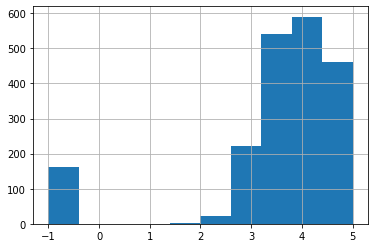

In [23]:
df.Rating.hist()

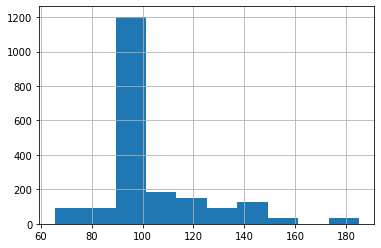

In [24]:
df.avg_salary.hist()

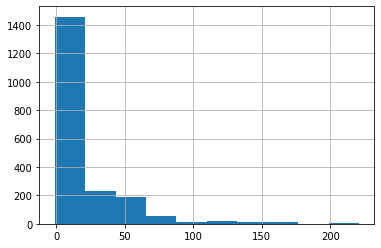

In [25]:
df.age.hist()

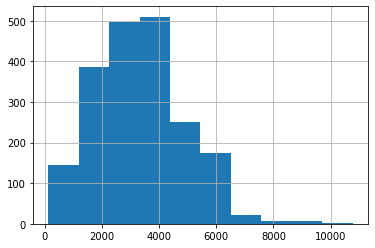

In [26]:
df.desc_len.hist()

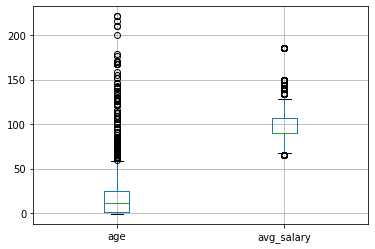

In [27]:
df.boxplot(column = ['age','avg_salary'])

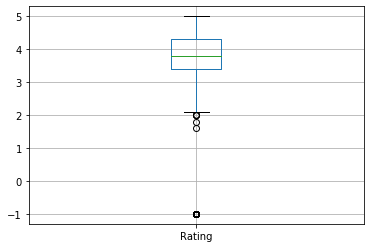

In [28]:
df.boxplot(column = 'Rating')

In [29]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.194708,0.186169,0.208446
avg_salary,0.194708,1.000000,0.074552,0.107870
Rating,0.186169,0.074552,1.000000,0.059177
desc_len,0.208446,0.107870,0.059177,1.000000


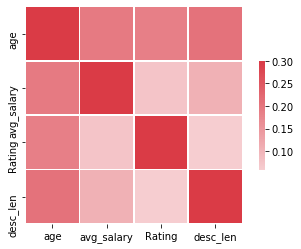

In [30]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'salary', 'State', 'age', 'SAS',
       'python', 'aws', 'tableau', 'spark', 'Ownership_Type', 'State_New',
       'Job_Title', 'Position_Level', 'desc_len', 'min_salary', 'max_salary',
       'avg_salary'],
      dtype='object')

In [32]:
# change -1 to unknow
df['Ownership_Type']= df['Type of ownership'].apply(lambda x: "Unknown" if x == '-1' else x)
df['Size']= df['Size'].apply(lambda x: "Unknown" if x == '-1' else x)

In [33]:
new_df = df[['Rating', \
       'Size', 'Ownership_Type','Sector', 'Revenue','State_New','Job_Title','Position_Level',
             'SAS', 'python', 'aws', 'tableau', 'spark','State', 'Industry', 'age']]

graph for Rating: total = 34


<Figure size 720x360 with 0 Axes>

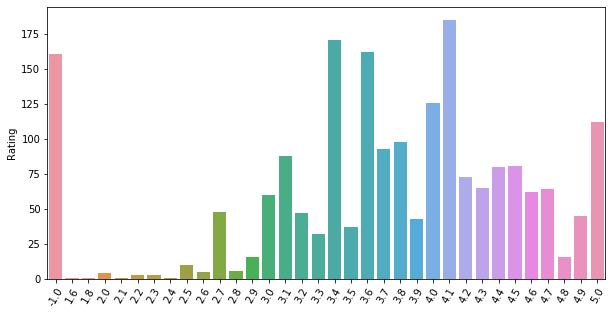

graph for Size: total = 8


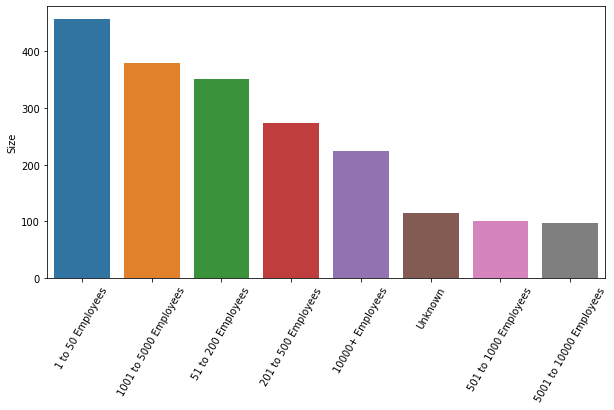

graph for Ownership_Type: total = 12


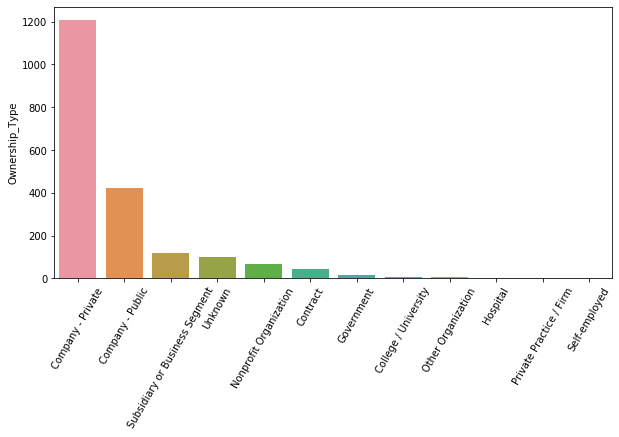

graph for Sector: total = 26


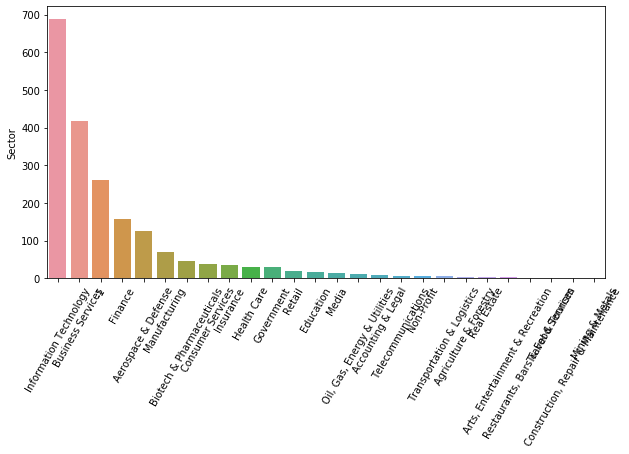

graph for Revenue: total = 14


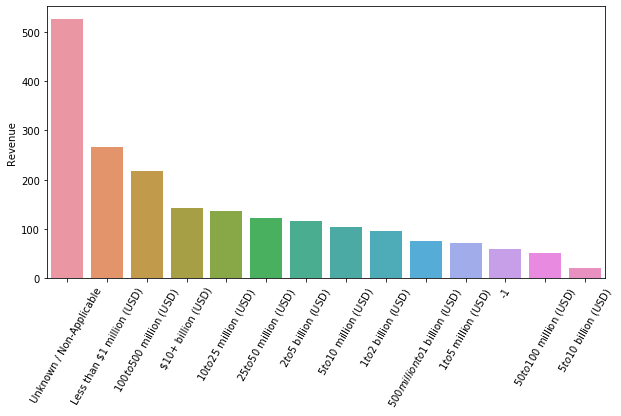

graph for State_New: total = 43


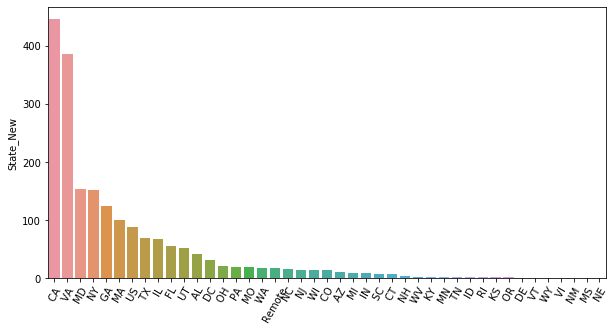

graph for Job_Title: total = 8


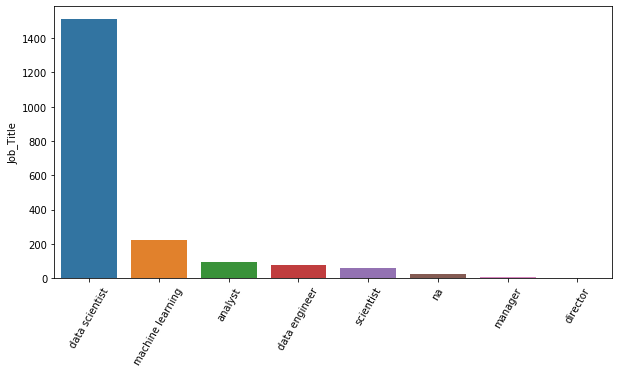

graph for Position_Level: total = 2


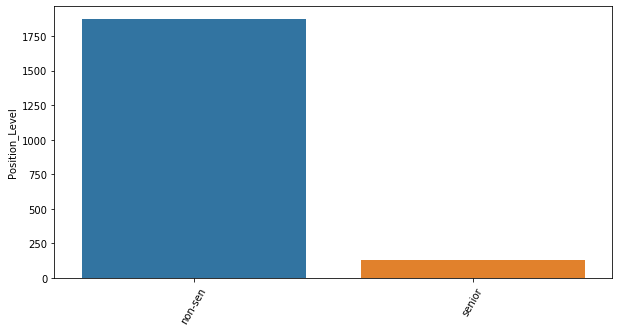

graph for SAS: total = 2


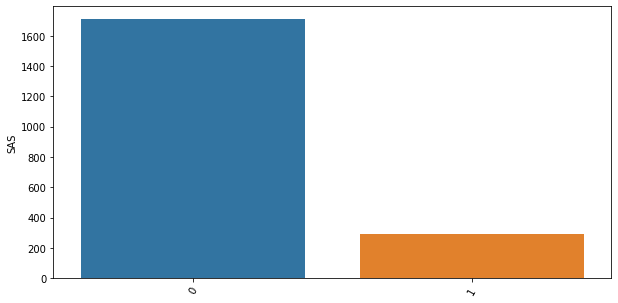

graph for python: total = 2


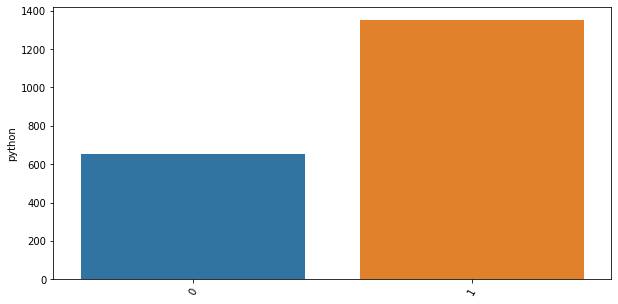

graph for aws: total = 2


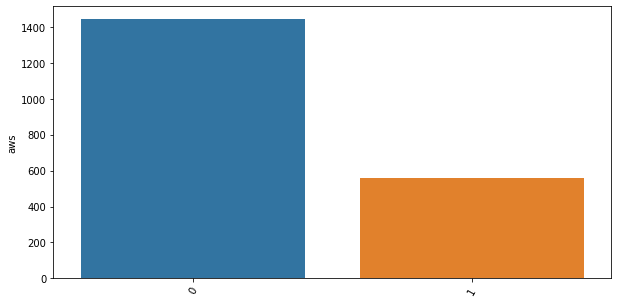

graph for tableau: total = 2


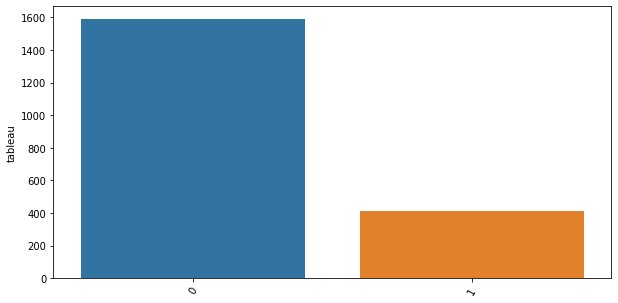

graph for spark: total = 2


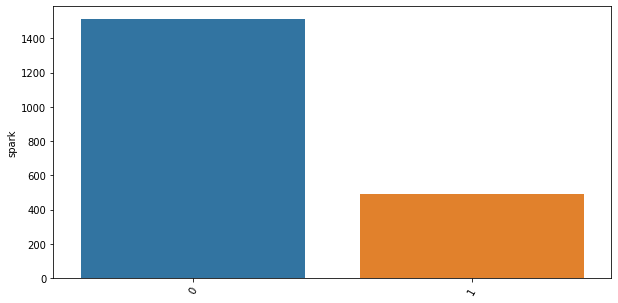

graph for State: total = 47


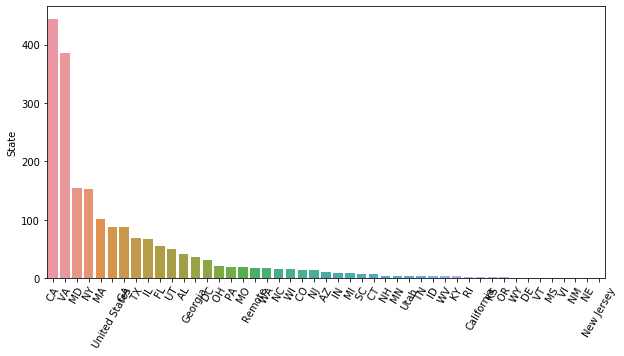

graph for Industry: total = 77


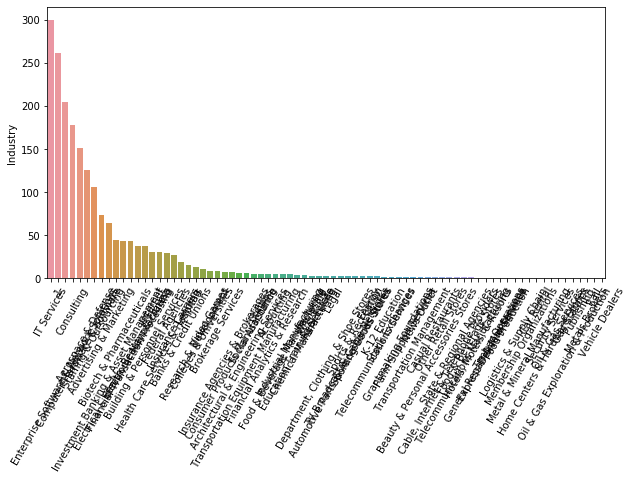

graph for age: total = 114


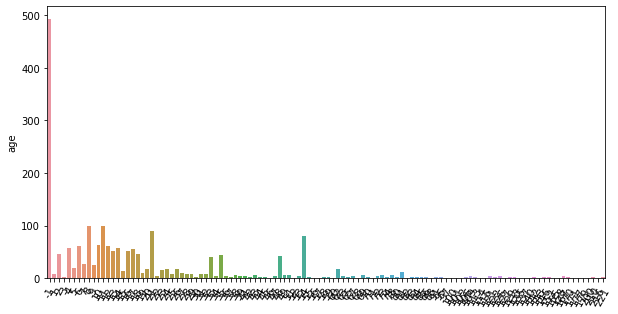

In [34]:
plt.figure(figsize=(10,5))
for i in new_df.columns:
    new_num = new_df[i].value_counts()
    print("graph for %s: total = %d" % (i, len(new_num)))
    plt.figure(figsize=(10,5))
    bar =sns.barplot(x=new_num.index, y=new_num, data=new_df)
    bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
    plt.show()

graph for State_New: total = 20


<Figure size 720x360 with 0 Axes>

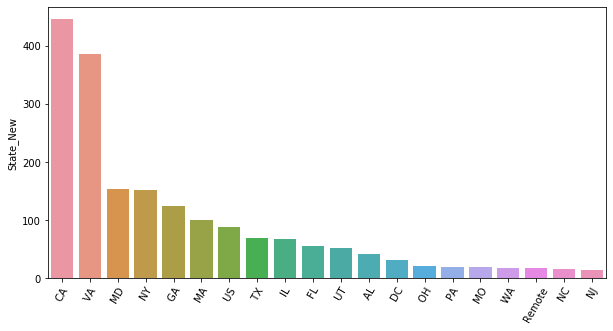

graph for Industry: total = 20


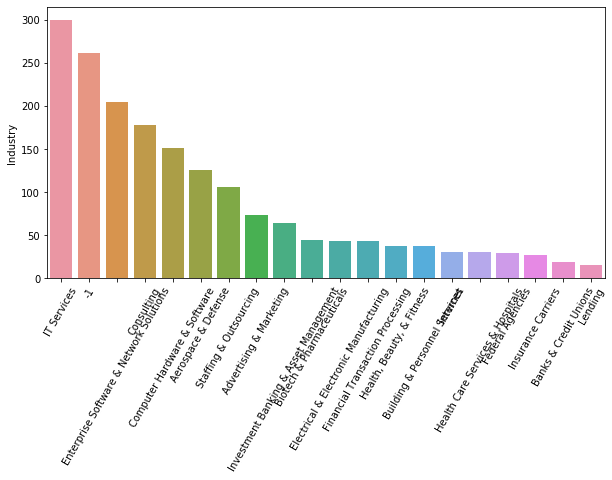

graph for age: total = 20


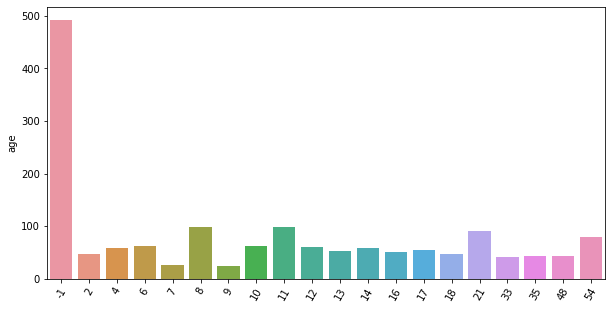

In [35]:
plt.figure(figsize=(10,5))
for i in new_df[['State_New', 'Industry', 'age']].columns:
    new_num = new_df[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(new_num)))
    plt.figure(figsize=(10,5))
    bar =sns.barplot(x=new_num.index, y=new_num, data=new_df)
    bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
    plt.show()

In [36]:
pd.pivot_table(df, index = 'Job_Title', values = 'avg_salary')

,avg_salary
Job_Title,
analyst,125.675258
data engineer,118.690789
data scientist,97.553974
director,132.666667
machine learning,94.118304
manager,111.416667
na,126.074074
scientist,114.254386


In [37]:
pd.pivot_table(df, index = ['Job_Title','Position_Level'], values = 'avg_salary')

avg_salary
Job_Title        Position_Level            
analyst          non-sen         129.295775
                 senior          115.788462
data engineer    non-sen         119.745283
                 senior          116.260870
data scientist   non-sen          96.306396
                 senior          129.946429
director         non-sen         132.666667
machine learning non-sen          93.939462
                 senior          134.000000
manager          non-sen         111.416667
na               non-sen         127.952381
                 senior          119.500000
scientist        non-sen         117.350000
                 senior          106.970588

In [38]:
pd.pivot_table(df, index = ['State','Job_Title'], values = 'avg_salary').sort_values('State', ascending = False)

avg_salary
State         Job_Title                   
Utah          data scientist    134.000000
              analyst           133.500000
United States scientist         106.000000
              na                101.500000
              data scientist     92.303797
...                                    ...
 AZ           machine learning   90.250000
              analyst           107.583333
              data scientist    138.833333
 AL           scientist         105.500000
              data scientist     92.012195

[134 rows x 1 columns]

In [39]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [40]:
pd.pivot_table(df, index = ['State','Job_Title'], values = 'avg_salary', aggfunc = 'count').sort_values('State', ascending = False)

avg_salary
State         Job_Title                   
Utah          data scientist             1
              analyst                    2
United States scientist                  2
              na                         1
              data scientist            79
              data engineer              4
              analyst                    2
Remote        na                         2
              manager                    1
              data scientist            10
              data engineer              3
              analyst                    2
New Jersey    data scientist             1
Georgia       data scientist            37
California    data scientist             2
 WY           analyst                    1
 WV           data scientist             3
 WI           scientist                  3
              na                         1
              data scientist             8
              data engineer              1
              analyst                    2
 WA           scientist                  1
              data scientist            14
              data engineer              1
              analyst                    2
 VT           data scientist             1
 VI           manager                    1
 VA           manager                    1
              data engineer             13
              machine learning           7
              data scientist           358
              na                         2
              scientist                  5
 UT           machine learning           1
              data scientist            45
              data engineer              2
              analyst                    2
 TX           data engineer              4
              analyst                    1
              data scientist            60
              machine learning           2
              scientist                  2
 TN           data scientist             2
              analyst                    1
 SC           data scientist             1
              analyst                    7
 RI           data engineer              2
 PA           data engineer              3
              analyst                    3
              data scientist            13
 OR           data scientist             2
 OH           scientist                  1
              data scientist            19
              analyst                    1
 NY           scientist                  1
              na                         3
              machine learning           3
              data scientist           130
              data engineer              6
              analyst                    9
 NM           data scientist             1
 NJ           analyst                    3
              na                         1
              director                   1
              data scientist             9
 NH           data scientist             4
 NE           scientist                  1
 NC           scientist                  3
              data scientist            10
              analyst                    3
 MS           scientist                  1
 MO           data scientist             8
              data engineer             10
              analyst                    1
 MN           na                         1
              data scientist             1
              analyst                    1
 MI           data scientist             8
              data engineer              1
 MD           data scientist           105
              analyst                    5
              data engineer              4
              machine learning          37
              scientist                  3
 MA           scientist                 12
              na                         6
              machine learning          45
              data scientist            30
              data engineer              3
              analyst                    5
 KY           data scientist     

In [41]:
pd.pivot_table(df[df['Job_Title'] == 'data scientist'], index = 'State', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
State,
OR,149.250000
NM,140.500000
AZ,138.833333
Utah,134.000000
TN,129.500000
NJ,127.333333
Remote,121.150000
California,121.000000
MO,119.875000


In [42]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Job_Title','Revenue',  'python', 'spark', 'aws', 'tableau','SAS', 'Type of ownership','avg_salary']]

In [43]:
for i in df_pivots.columns[:-1]:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.4    149.000000
 1.6    134.000000
 2.6    131.600000
 1.8    127.500000
 4.8    123.000000
 2.8    121.833333
 3.9    117.023256
 3.2    116.202128
 3.5    114.648649
 3.8    111.739796
 2.9    109.812500
 4.5    105.703704
 4.3    104.246154
 3.3    103.390625
 3.7    103.048387
 4.7    101.960938
 2.1    101.500000
 2.2    101.000000
 4.4    100.900000
 2.0    100.750000
 5.0     99.147321
 3.0     99.050000
 4.0     98.992063
 4.2     98.315068
 3.4     97.347953
 3.6     96.768519
 4.9     96.255556
 2.3     95.333333
 4.1     94.805405
 4.6     94.379032
-1.0     94.229814
 2.5     93.950000
 2.7     93.000000
 3.1     92.437500
Industry
                                         avg_salary
Industry                                           
General Repair & Maintenance             185.000000
Insurance Agencies & Brokerages          153.285714
Sports & Recreation                      146.000000
Stock Exchanges                         

In [44]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),20,75
$1 to $5 million (USD),6,65
$10 to $25 million (USD),91,46
$10+ billion (USD),93,49
$100 to $500 million (USD),118,99
$2 to $5 billion (USD),11,105
$25 to $50 million (USD),15,106
$5 to $10 billion (USD),9,12
$5 to $10 million (USD),84,19


In [45]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

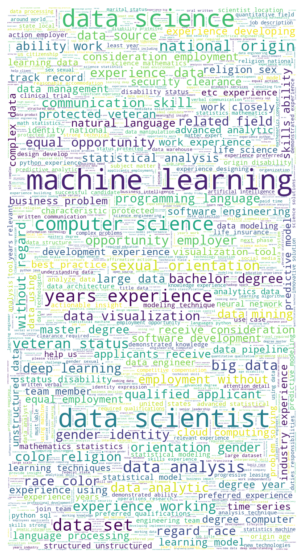

In [46]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [47]:
df.to_csv('eda_data.csv')

In [48]:
''' 
#####some useful trick#####
import re
regex = '\d+'             
    
match = re.findall(regex, string)  
print(match)  


df['Company'] = df.apply(lambda x: x['Company Name'] if x['Rating'] < 1 else x['Company Name'][:-3], axis = 1)
remove the \n from company name
df['Company'] = df.Company.apply(lambda x: x.replace('\n', ''))

pd.options.display.max_rows
pd.set_option('display.max_rows', None)

'''


" \n#####some useful trick#####\nimport re\nregex = '\\d+'             \n    \nmatch = re.findall(regex, string)  \nprint(match)  \n\n\ndf['Company'] = df.apply(lambda x: x['Company Name'] if x['Rating'] < 1 else x['Company Name'][:-3], axis = 1)\nremove the \n from company name\ndf['Company'] = df.Company.apply(lambda x: x.replace('\n', ''))\n\npd.options.display.max_rows\npd.set_option('display.max_rows', None)\n\n"